In [22]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [23]:
df = pd.read_csv('../full_data/full_final.csv')
df3 = pd.read_csv('../full_data/final.csv')

In [24]:
df.head()

,STATE,RACE,S1_DEM_RATIO,S2_DEM_RATIO,S3_DEM_RATIO,S4_DEM_RATIO,S5_DEM_RATIO,S6_DEM_RATIO,S1_REP_RATIO,S2_REP_RATIO,...,S5_COR(DD),S6_COR(DD),S1_COR(RR),S2_COR(RR),S3_COR(RR),S4_COR(RR),S5_COR(RR),S6_COR(RR),TIGHT_RACE,WINNER
0,GA,D,0.972847,0.880837,0.934739,0.909264,0.980087,0.938428,1.005641,1.034671,...,0.975230,0.968778,0.943364,0.976896,0.886676,0.983273,0.984967,0.832798,False,R
1,GA,D,1.042873,1.023111,0.947697,0.977349,0.967845,0.977528,0.998378,0.996034,...,0.937928,0.916904,0.977416,0.981946,0.991279,0.945774,0.926077,0.973913,False,R
2,GA,D,1.057206,1.032403,1.016869,1.003231,1.014419,1.010240,0.963700,0.945909,...,0.900027,0.936769,0.977356,0.920450,0.925857,0.445100,0.927122,0.782898,False,D
3,GA,D,1.132094,1.084752,1.055107,0.977534,0.978053,0.982304,0.986914,0.988935,...,0.973522,0.975228,0.991287,0.982673,0.979749,0.981854,0.985002,0.979031,False,R
4,GA,D,1.053853,1.014177,0.980799,0.995695,0.979253,0.976380,0.995590,0.996645,...,0.935997,0.989362,0.969014,0.979368,0.950570,0.958653,0.955762,0.965287,False,R


## Grabbing all 2012-2014 data

In [29]:
data_dir = '/Users/lancefernando/Desktop/Fall_Mod2/machine_learning/MYWORK/FINALPROJECT/msds621_election_decisons/full_data'
states = ['VA', 'MN', 'CO', 'FL']
election = ['Midterm', 'Presidential']
pres12_df = None
midt14_df = None

In [30]:
for state in states:
    for elec in election:
        curr_path = data_dir + '/' + state + '/' + elec
        curr_files = [f for f in os.listdir(curr_path) if not f.startswith('.')]
        for file in curr_files:
            curr_race = file.split('_')[0]
            if curr_race in ['GOV', 'SEN']: continue
            curr_df = pd.read_csv(curr_path + '/' + file)
            curr_df['RACE'] = curr_race
            if elec == 'Midterm':
                if midt14_df is None:
                    midt14_df = curr_df
                else:
                    midt14_df = midt14_df.append(curr_df)
            else:
                if pres12_df is None:
                    pres12_df = curr_df
                else:
                    pres12_df = pres12_df.append(curr_df)

# Grabbing all 2016-2018 data

In [32]:
def mostrecent(files):
    """Helper to get more recently scrapped file"""
    if len(files) > 0:
        int_names = [int(f.split('.')[0]) for f in files]
        most_recent = max(int_names)
        index = int_names.index(most_recent)
    else:
        raise RuntimeError('File %s not found' % files)
    return files[index]

def get_old_filepaths(path, alert):
    """
    For a specified alert
    :return: the filepaths for a given alertname and the race
    """
    data2016 = path + 'msds621_election_decisons/full_data/efs/data2016/'
    scrape_2018 = path + 'msds621_election_decisons/full_data/efs/scrape_2018/'

    paths = []

    races = [d for d in os.listdir(data2016 + alert) if not d.startswith('.')]

    for r in races:
        results_2016 = data2016 + alert + '/' + r + '/results2016.csv'

        files = [d for d in os.listdir(scrape_2018 + alert + '/' + r + '/') if
                 not d.startswith('.')]
        last_scrape = scrape_2018 + alert + '/' + r + '/' + mostrecent(files)

        paths.append((results_2016, last_scrape, r))

    return paths

pres16_df = None
midt18_df = None
alerts = ['AR_SOS','GA_SOS', 'MN_SOS', 'NC_SOS', 'NM_SOS', 'VA_SOS']
base_path ='/Users/lancefernando/Desktop/Fall_Mod2/machine_learning/MYWORK/FINALPROJECT/'
for alert in alerts:
    paths = get_old_filepaths(base_path, alert)
    for path in paths:
        if path[2] in ['GOV', 'SEN']: continue
        curr_midt = pd.read_csv(path[1])
        curr_pres = pd.read_csv(path[0])
        curr_midt['RACE'] = path[2]
        curr_pres['RACE'] = path[2]
        if midt18_df is None:
            midt18_df = curr_midt
        else:
            midt18_df = midt18_df.append(curr_midt)

        if pres16_df is None:
            pres16_df = curr_pres
        else:
            pres16_df = pres16_df.append(curr_pres)
# Removing weird columns from New Mexico
midt18_df = midt18_df[['STATE', 'COUNTY', 'PRECINCT', 'DEM', 'REP', 'RACE']]

# Visualization Ideas
* Number of districts per state (Bar Plot)
* Average number of precincts per district in each state (Box Plot)
* Number of tight races per state (Bar Plot)
* #Rep:#Dem Districts per state (100% Horizontal Stacked Bar)
* Number of districts that changed party from Pres to Midt per state (Bar Plot
* Distribution of Strata Ratios by party (Violin Plot)

# Number of precincts

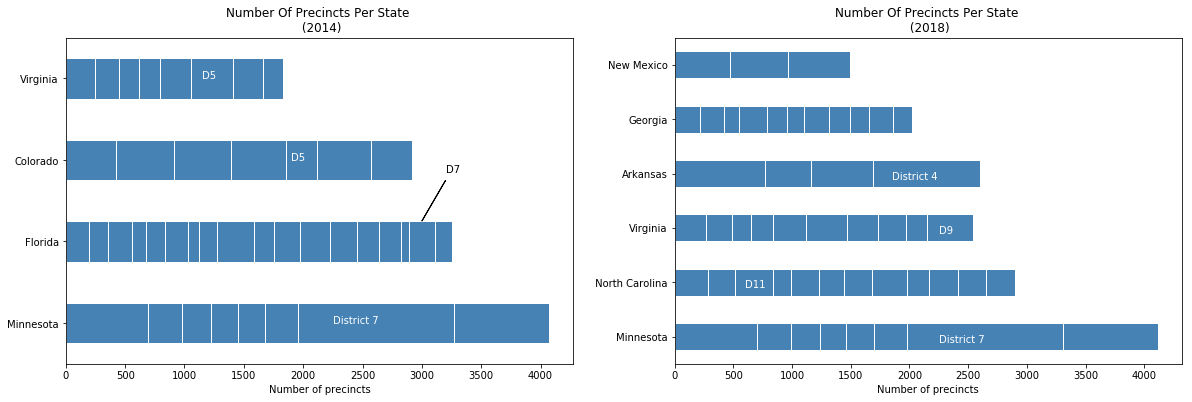

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,6))
state_count = midt14_df.groupby(['STATE', 'RACE']).size().unstack().fillna(0)
ax = state_count.reindex(['MN','FL', 'CO', 'VA']).plot(kind='barh',
    stacked=True,
    legend=False,
    color = 'steelblue',
    edgecolor='white',
    ax = axes[0])
ax.set_xlabel('Number of precincts')
ax.set_yticklabels(labels=['Minnesota', 'Florida', 'Colorado', 'Virginia'])
ax.set_ylabel('')
ax.text(x=2250, y=0, s='District 7', color='white')
ax.text(x=1900, y=2, s='D5', color='white')
ax.text(x=1150, y=3, s='D5', color='white')
ax.text(x=3200, y=1.85, s='D7', color='black')
ax.arrow(x=3000, dx=200, y=1.25, dy=0.5)
ax.set_title('Number Of Precincts Per State \n (2014)')

state_count18 = midt18_df.groupby(['STATE', 'RACE']).size().unstack().fillna(0)
ax18 = state_count18.reindex(['MN','NC','VA','AR','GA','NM']).plot(kind='barh', 
    stacked=True,
    legend=False,
    color = 'steelblue',
    edgecolor='white',
    ax = axes[1])
ax18.set_xlabel('Number of precincts')
ax18.set_yticklabels(labels=['Minnesota',' North Carolina', 'Virginia', 'Arkansas', 'Georgia', 'New Mexico'])
ax18.set_ylabel('')
ax18.text(x=2250, y=-0.1, s='District 7', color='white')
ax18.text(x=2250, y=1.9, s='D9', color='white')
ax18.text(x=600, y=0.9, s='D11', color='white')
ax18.text(x=1850, y=2.9, s='District 4', color='white')
ax18.set_title('Number Of Precincts Per State \n (2018)')

plt.show()

# Distribution or Dem/Rep Ratios

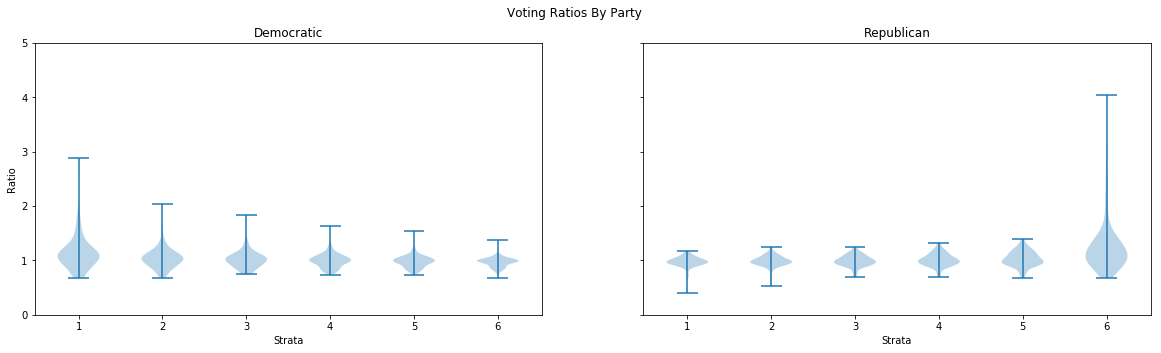

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
ax[0].violinplot([df.S1_DEM_RATIO,
               df.S2_DEM_RATIO,
               df.S3_DEM_RATIO,
               df.S4_DEM_RATIO,
               df.S5_DEM_RATIO,
               df.S6_DEM_RATIO])
ax[0].set_ylim(0, 5)
ax[0].set_xlabel('Strata'),
ax[0].set_ylabel('Ratio')
ax[0].set_title('Democratic')
ax[1].violinplot([df.S1_REP_RATIO,
               df.S2_REP_RATIO,
               df.S3_REP_RATIO,
               df.S4_REP_RATIO,
               df.S5_REP_RATIO,
               df.S6_REP_RATIO])
ax[1].set_ylim(0, 5)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Strata')
ax[1].set_title('Republican')
fig.suptitle('Voting Ratios By Party')
plt.show()

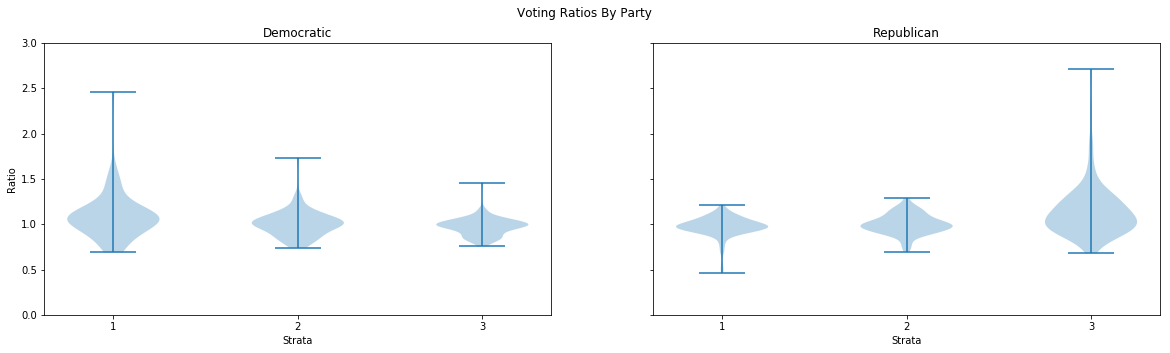

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle('Voting Ratios By Party')

# Democratic Plot
ax[0].violinplot([df3.S1_DEM_RATIO,
               df3.S2_DEM_RATIO,
               df3.S3_DEM_RATIO])
ax[0].set_ylim(0, 3)
ax[0].set_xlabel('Strata'),
ax[0].set_ylabel('Ratio')
ax[0].set_title('Democratic')
ax[0].set_xticks([1,2,3])

# Republican Plot
ax[1].violinplot([df3.S1_REP_RATIO,
               df3.S2_REP_RATIO,
               df3.S3_REP_RATIO])
ax[1].set_ylim(0, 3)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Strata')
ax[1].set_title('Republican')
ax[1].set_xticks([1,2,3])

plt.show()

# Analyzing Races That Flipped From Pres To Midterm

In [40]:
by_race16 = pres16_df.groupby(['STATE', 'RACE']).sum()
by_race18 = midt18_df.groupby(['STATE', 'RACE']).sum()
grouped18 = by_race16.join(by_race18, on=['STATE','RACE'], how='inner')
grouped18['Win16'] = grouped18.PAST_DEM > grouped18.PAST_REP
grouped18.Win16 = grouped18.Win16.map({False:'Republican', True:'Democratic'})
grouped18['Win18'] = grouped18.DEM > grouped18.REP
grouped18.Win18 = grouped18.Win18.map({False:'Republican', True:'Democratic'})

by_race12 = pres12_df.groupby(['STATE', 'RACE']).sum()
by_race14 = midt14_df.groupby(['STATE', 'RACE']).sum()
grouped14 = by_race12.join(by_race14, on=['STATE','RACE'], how='inner')
grouped14['Win12'] = grouped14.PAST_DEM > grouped14.PAST_REP
grouped14.Win12 = grouped14.Win12.map({False:'Republican', True:'Democratic'})
grouped14['Win14'] = grouped14.DEM > grouped14.REP
grouped14.Win14 = grouped14.Win14.map({False:'Republican', True:'Democratic'})

In [41]:
changed18 = grouped18[grouped18.Win16 != grouped18.Win18]
changed14 = grouped14[grouped14.Win12 != grouped14.Win14]

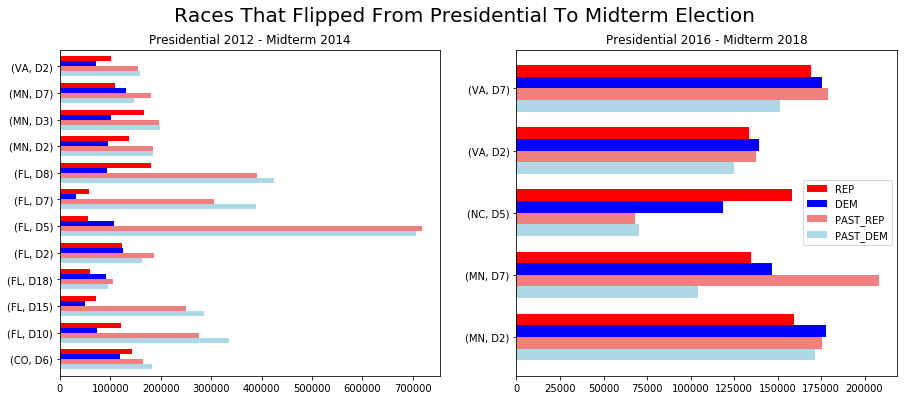

In [131]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax = changed18.plot(kind='barh', figsize=(15,6), width=.75,
                 color = ['lightblue', 'lightcoral','blue','red'],
                 ax=axes[1])
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))  # reverse both handles and labels
ax.set_title('Presidential 2016 - Midterm 2018')

ax2 = changed14.plot(kind='barh', figsize=(15,6), width=.75,
                 color = ['lightblue', 'lightcoral','blue','red'],
                 ax=axes[0], legend=False)
ax2.set_title('Presidential 2012 - Midterm 2014')

fig.suptitle('Races That Flipped From Presidential To Midterm Election', fontsize=20)
plt.show()

# Tight Races

In [77]:
tight14 = midt14_df.groupby(['STATE','RACE']).sum()
tight18 = midt18_df.groupby(['STATE', 'RACE']).sum()

In [83]:
perc_tight14 = tight14[['DEM', 'REP']].div(tight14.sum(1), axis=0)
perc_tight14 = perc_tight14[abs(perc_tight14.DEM - perc_tight14.REP) < 0.10]
perc_tight18 = tight18[['DEM', 'REP']].div(tight18.sum(1), axis=0)
perc_tight18 = perc_tight18[abs(perc_tight18.DEM - perc_tight18.REP) < 0.10]

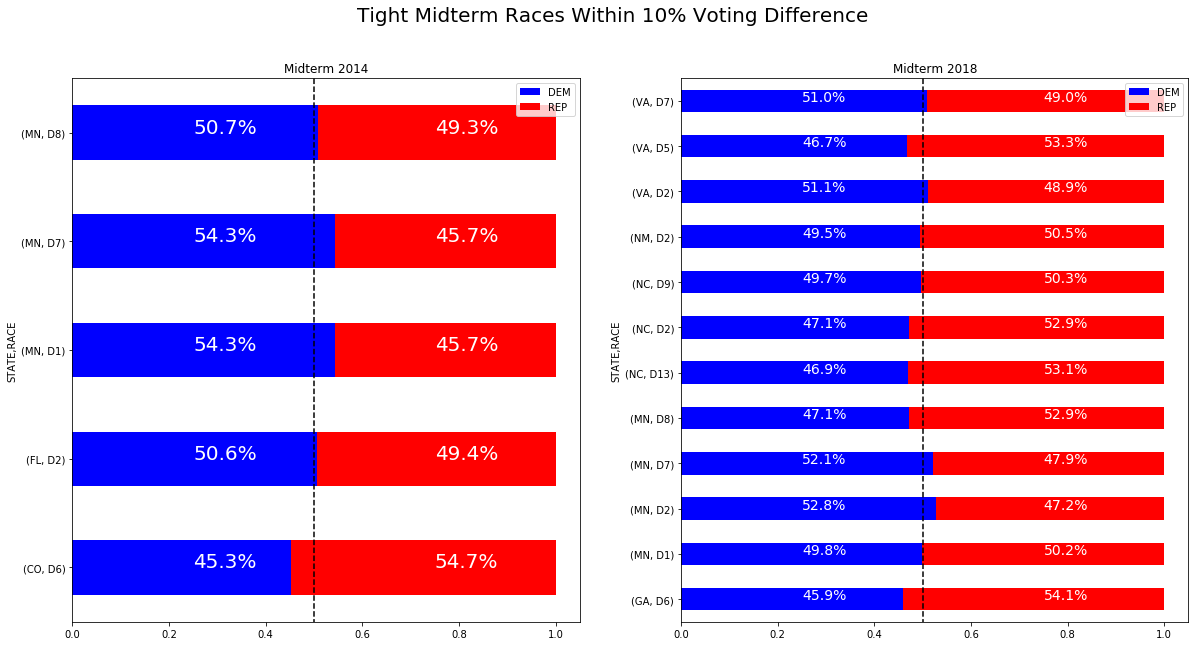

In [145]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
fig.suptitle('Tight Midterm Races Within 10% Voting Difference', fontsize=20)
ax = perc_tight14.plot(kind='barh',
                      stacked=True,
                     color=['blue', 'red'],
                      ax = axes[0])
ax.axvline(x=0.5, ymax=0, ymin=100, linestyle='--', color='black')
ax.set_title('Midterm 2014')
for i, row in enumerate(perc_tight14.iterrows()):
    ax.text(s='{:.1%}'.format(row[1][0]), x=0.25, y=i,
           fontsize=20, color='white')
    ax.text(s='{:.1%}'.format(row[1][1]), x=0.75, y=i,
       fontsize=20, color='white')

ax2 = perc_tight18.plot(kind='barh',
                      stacked=True,
                     color=['blue', 'red'],
                      ax = axes[1])
ax2.axvline(x=0.5, ymax=0, ymin=100, linestyle='--', color='black')
ax2.set_title('Midterm 2018')
for i, row in enumerate(perc_tight18.iterrows()):
    ax2.text(s='{:.1%}'.format(row[1][0]), x=0.25, y=i,
           fontsize=14, color='white')
    ax2.text(s='{:.1%}'.format(row[1][1]), x=0.75, y=i,
       fontsize=14, color='white')
plt.show()

# Accuracy Plot

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
def create_acc_plot(acc, labs):
    fig, axes = plt.subplots(figsize=(14,6))
    axes.bar(x=labs, height=acc)
    plt.show()

# Confusion Matrices

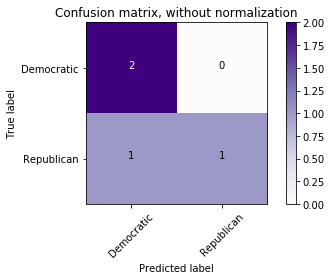

In [211]:
from sklearn.metrics import confusion_matrix
import itertools
# From https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
y_test = ['Democratic','Republican','Republican', 'Democratic']
y_pred = ['Democratic','Democratic','Republican', 'Democratic']
class_names = ['Democratic', 'Republican']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()